In [1]:
import numpy as np

perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

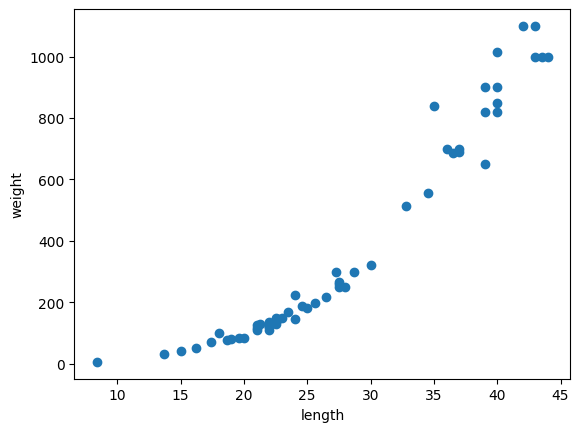

In [2]:
import matplotlib.pyplot as plt

plt.scatter(perch_length, perch_weight)
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [3]:
len(perch_length)
len(perch_weight)

print(perch_length.shape)
print(perch_weight.shape)

(56,)
(56,)


In [4]:
from sklearn.model_selection import train_test_split

#훈련 세트와 테스터 세트로 나눔
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

print(train_input.shape, test_input.shape)

(42,) (14,)


In [5]:
#예시 
import numpy as np

st_arr = np.array([1,2,3,4])
print((st_arr.reshape(2,2)).shape)
print(st_arr.reshape(2,2))
print((st_arr.reshape(-1,1)).shape)
print(st_arr.reshape(-1,1))

(2, 2)
[[1 2]
 [3 4]]
(4, 1)
[[1]
 [2]
 [3]
 [4]]


In [6]:
#훈련
## 2차원 배열로 만들기
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

## K-최근접 이웃 회귀 모델
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()
knr.n_neighbores =5 #하이퍼파라미터 튜닝, 1, 3, 5, 7
knr.fit(train_input, train_target)

# 모델의 평가
# 좋은 모델 = score -> train > test
# train < test = 과소적합
knr.score(test_input, test_target)
# 0.99 = 결정계수
knr.score(train_input, train_target)
# 0.96

0.9698823289099254

In [7]:
## 수동 예측

t_input = test_input[2]
p = knr.predict(t_input.reshape(1, -1))

print(f"예측 사용 무게:{p}")
print(f"실 무게:{test_target[2]}")

예측 사용 무게:[248.]
실 무게:250.0


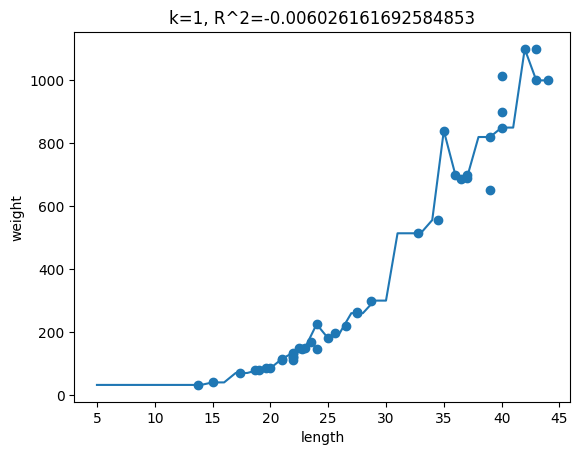

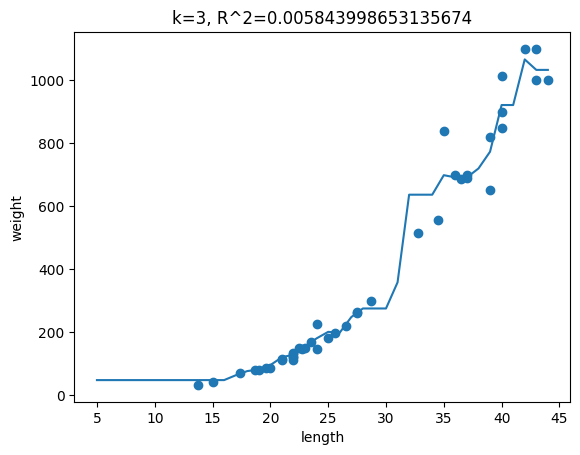

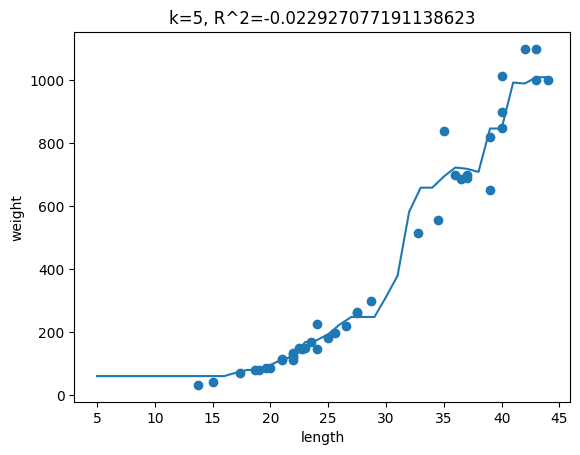

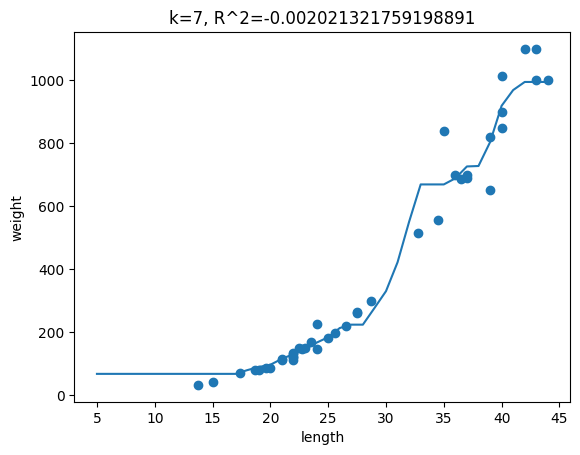

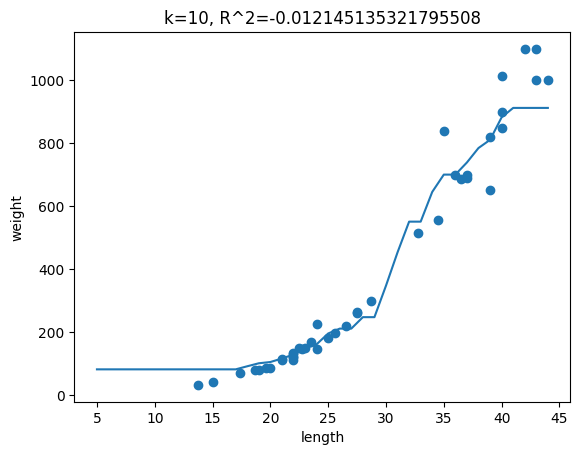

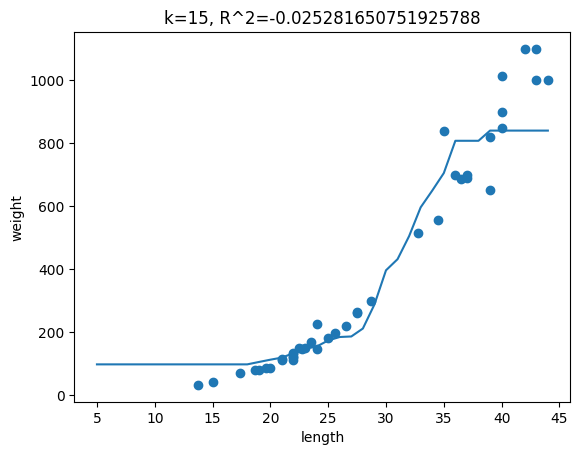

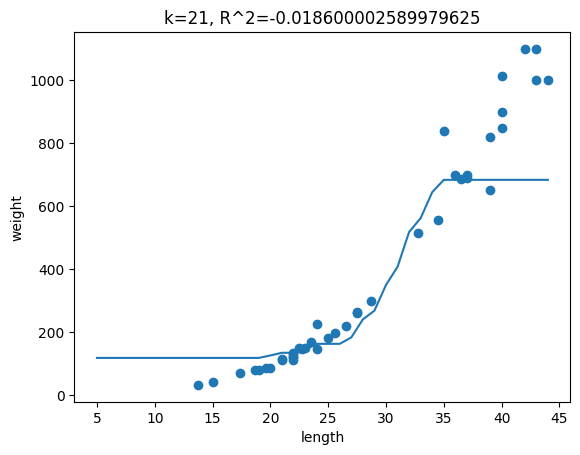

In [8]:
### 그래프로 그려보기

knr = KNeighborsRegressor()
x = np.arange(5, 45).reshape(-1, 1)
for k in [1, 3, 5, 7, 10, 15, 21]:
    knr.n_neighbors = k
    knr.fit(train_input, train_target)
    prediction = knr.predict(x)
    #결정R^2
    s_train = knr.score(train_input, train_target)
    s_test = knr.score(test_input, test_target)

    plt.title(f'k={k}, R^2={s_train-s_test}')
    plt.scatter(train_input, train_target)
    plt.plot(x, prediction)
    plt.xlabel('length')
    plt.ylabel('weight')
    plt.show()

In [9]:
# K=3이 가장 좋다..

knr = KNeighborsRegressor(n_neighbors = 3)

knr.fit(train_input, train_target)
print(knr.predict([[40]]))
print(knr.predict([[41]]))
print(knr.predict([[42]]))
print(knr.predict([[43]]))
print(knr.predict([[44]]))
print(knr.predict([[50]]))

[921.66666667]
[921.66666667]
[1066.66666667]
[1033.33333333]
[1033.33333333]
[1033.33333333]


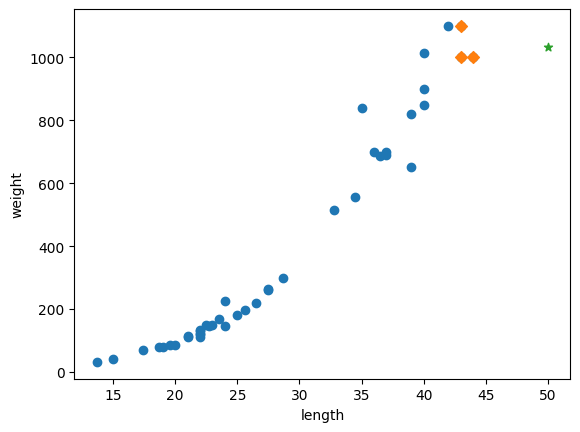

In [10]:
##이웃 찾아 차트 그리기
w = 50
d, i = knr.kneighbors([[w]])

###훈련 데이터의 산점도 추가
plt.scatter(train_input, train_target)
### 예측에 사용된 이웃 & 예측 값
plt.scatter(train_input[i], train_target[i], marker='D') #이웃 3
plt.scatter(50, 1033.333333, marker='*')
#plt.scatter(w, knr.predict([[w]])[0], marker='*') #50 이상인 값
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# 선형회귀

In [11]:
# 대안 - 위 문제를 해결하기 위한 선형회귀 모듈 사용
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_input, train_target) #훈련 끝

LinearRegression()

In [12]:
# 예측
print(lr.predict([[50]]))
print(knr.predict([[50]])) #knr이랑 비교

[1241.83860323]
[1033.33333333]


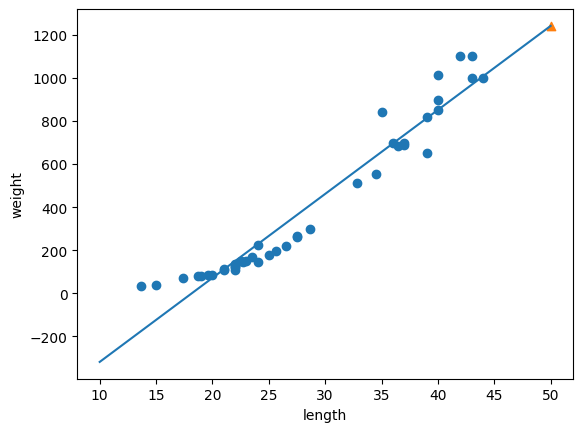

In [14]:
# 선형 그래프 그리기
# 무게 = A * 길이 + B
A = lr.coef_ #계수 
B = lr.intercept_ #절편, 독립항

plt.scatter(train_input, train_target)
plt.plot([10,50], [10 * A + B,50 * A + B])
plt.scatter(50, 1241.83860323, marker="^")
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [15]:
lr.predict([[50]]) == A * 50 + B #True
lr.predict([[14]]) #False

array([-162.77861546])

In [16]:
#2차원 배열로 만들기
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [17]:
#다항회귀 모델의 그래프 그려보기
train_poly = np.column_stack( ( train_input ** 2 , train_input))
test_poly = np.column_stack( ( test_input ** 2 , test_input))
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.predict([[50 ** 2, 50]]))

[1573.98423528]


In [18]:
#다항식 : weight = (A * (length)^2) + (B * length) + C
print(lr.coef_, lr.intercept_)
A = lr.coef_[0]
B = lr.coef_[1]
C = lr.intercept_

[  1.01433211 -21.55792498] 116.05021078278264


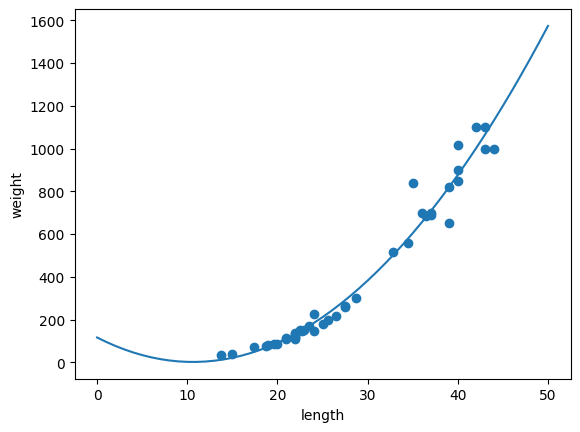

In [19]:
#다항식 차트로 그려보기
points = np.arange(0, 51)
plt.scatter(train_input, train_target)
plt.xlabel('length')
plt.ylabel('weight')
plt.plot(points, (A * points**2) + (B * points) + C )
plt.show()